In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 1.3MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=583531 sha256=b404cf1f0042c5b79c73a19da96d2552fca80a5ecbd7a6638cabb2d8ea20c2ad
  Stored in directory: /home/nbuser/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Libraries for Analysis
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.linear_model import LinearRegression
import mglearn
import matplotlib.pyplot as plt
import scipy.io

# Allow plots to appear in the notebook
%matplotlib inline

# Libraries for Visuals
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns; sns.set(font_scale = 1.2)
import csv
linear_regression_model = LinearRegression() # Pass any parameters
knn = KNeighborsClassifier(n_neighbors=3)
from pandas.plotting import scatter_matrix

Python version: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
pandas version: 0.23.4
matplotlib version: 3.0.0
NumPy version: 1.16.2
SciPy version: 1.1.0
IPython version: 7.1.1
scikit-learn version: 0.20.3


## Read Data

In [4]:
# Read the PV and Weather Data
data = pd.read_csv('5 Day Denver Data CSV.csv')
print("Keys of data: \n{}".format(data.keys()))

Keys of data: 
Index(['DATE (MM/DD/YYYY)', 'MST', 'Time', 'Irradiance', 'Temperature',
       'Cloud Cover'],
      dtype='object')


In [5]:
data.head()

,DATE (MM/DD/YYYY),MST,Time,Irradiance,Temperature,Cloud Cover
0,2/26/2020,6:41,6.41,8.30857,-4.660,-1
1,2/26/2020,6:42,6.42,9.73460,-4.802,-1
2,2/26/2020,6:43,6.43,10.98240,-4.829,-1
3,2/26/2020,6:44,6.44,12.30970,-4.784,-1
4,2/26/2020,6:45,6.45,13.70510,-4.715,-1


In [6]:
data.tail()

,DATE (MM/DD/YYYY),MST,Time,Irradiance,Temperature,Cloud Cover
2677,2/29/2020,17:46,17.46,11.26460,9.45,-1
2678,2/29/2020,17:47,17.47,10.47150,9.46,-1
2679,2/29/2020,17:48,17.48,9.67800,9.42,-1
2680,2/29/2020,17:49,17.49,9.07676,9.40,-1
2681,2/29/2020,17:50,17.50,8.45235,9.26,-1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


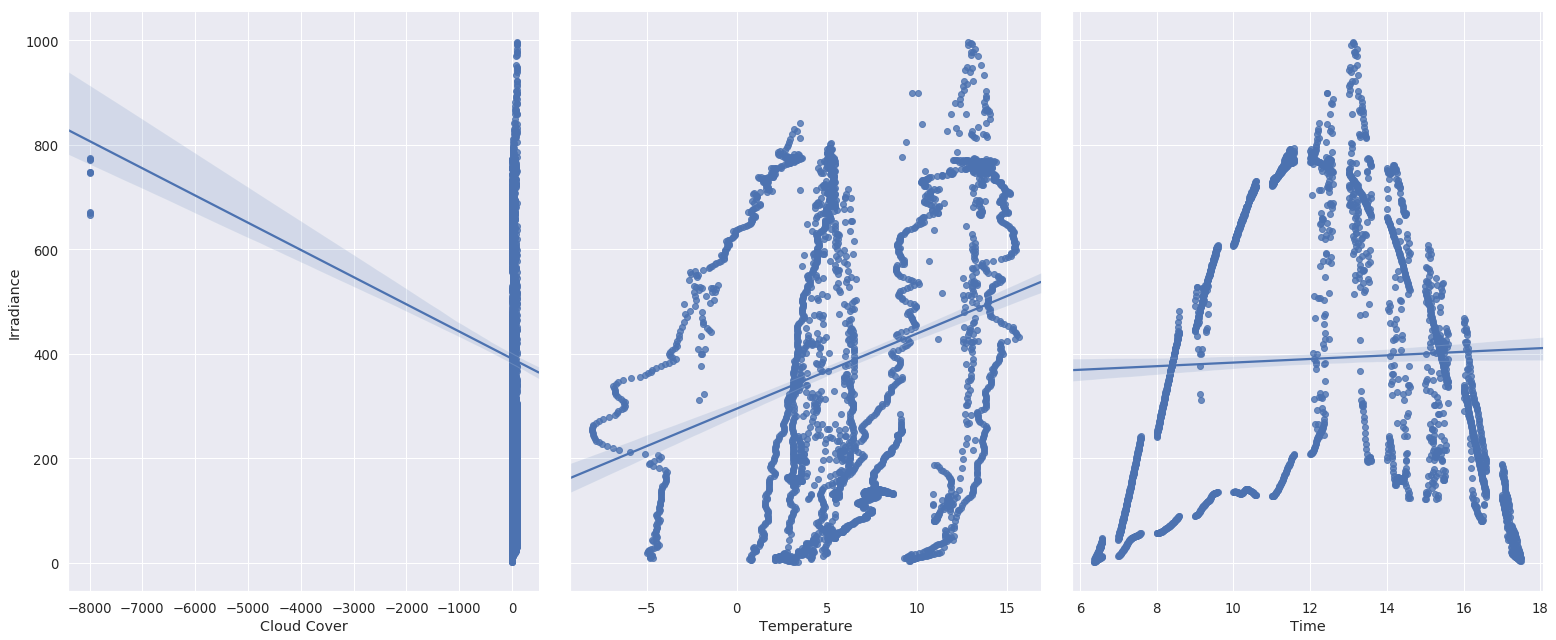

In [8]:
# Visualize the relationship between the Irradiance and the weather conditions
sns.pairplot(data, x_vars=['Cloud Cover','Temperature', 'Time'], y_vars='Irradiance', height=9, aspect=0.8, kind='reg')

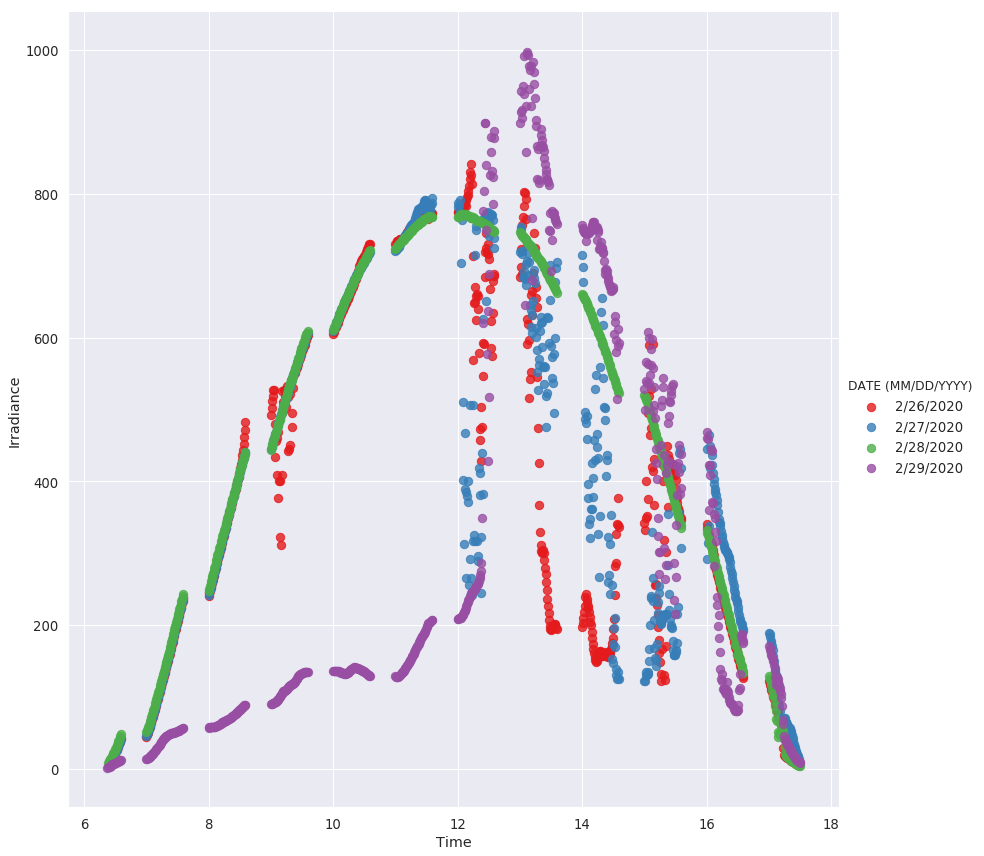

In [10]:
# Plot two parameters
sns.lmplot('Time','Irradiance', data=data, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

## Train and Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = data.drop(['DATE (MM/DD/YYYY)', 'MST', 'Time', 'Irradiance', 'Temperature'], axis = 'columns')

In [15]:
X = data.drop(['DATE (MM/DD/YYYY)', 'MST', 'Cloud Cover'], axis = 'columns')
X.head()

,Time,Irradiance,Temperature
0,6.41,8.30857,-4.660
1,6.42,9.73460,-4.802
2,6.43,10.98240,-4.829
3,6.44,12.30970,-4.784
4,6.45,13.70510,-4.715


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 42)